In [1]:
import pandas as pd
import numpy as np

In [3]:
rsd_df= pd.read_csv("train.csv")
store_df=pd.read_csv("store.csv")

In [6]:
rsd_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
#Getting the sales data information
rsd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#Getting the stores data information
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# Describing the sales dataset
rsd_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
# Describing the stores dataset
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [13]:
# Checking the null values 
rsd_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
# Checking the null values 
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
store_df.count().sum()

8807

In [17]:
rsd_df.count().sum()

9154881

<IPython.core.display.Javascript object>

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

Text(0.5, 0, 'Competition Distance Distribution Plot')

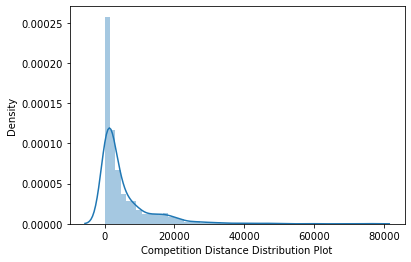

In [19]:
#distribution plot of competition distance
sns.distplot(x=store_df['CompetitionDistance'])
plt.xlabel('Competition Distance Distribution Plot')

In [18]:
# filling competition distance with the median value
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)

In [20]:
# filling competition open since month with the most occuring values of the columns i.e modes of those columns
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [21]:
# filling competition open since year with the most occuring values of the columns
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [22]:
# imputing the nan values of promo2 related columns with 0
store_df['Promo2SinceWeek'].fillna(value=0, inplace=True)
store_df['Promo2SinceYear'].fillna(value=0, inplace=True)
store_df['PromoInterval'].fillna(value=0, inplace=True)

In [23]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
#merge the datasets on stores data
df=Rsd_df.merge(right=store_df, on="Store", how='left')

In [25]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [26]:
df.shape

(1017209, 18)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [28]:
# importing datetime 
from datetime import datetime as dt

In [29]:
df['Date']=pd.to_datetime(df["Date"], format="%Y/%m/%d")
df['Date']

0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
1017204   2013-01-01
1017205   2013-01-01
1017206   2013-01-01
1017207   2013-01-01
1017208   2013-01-01
Name: Date, Length: 1017209, dtype: datetime64[ns]

Exploratory Data Analysis

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. 

In [31]:
#DayOfWeek coloumn
df['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Open', ylabel='Sales'>

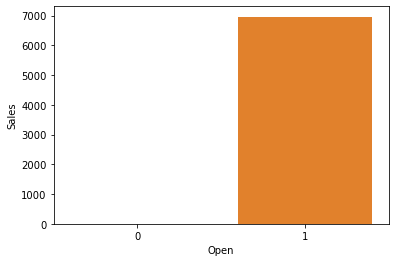

In [32]:
# plot between sales and open columns
sns.barplot(x="Open", y="Sales", data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

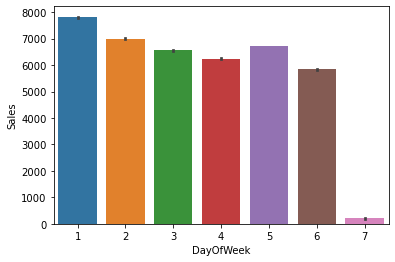

In [33]:
# Relationship between Day of week and sales
sns.barplot(x='DayOfWeek',y='Sales', data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

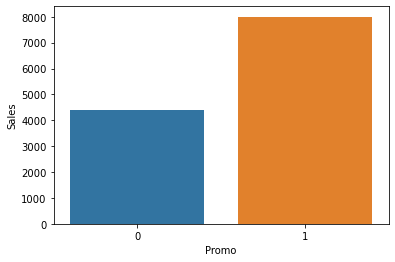

In [34]:
## Relationship between Promo and sales
sns.barplot(x='Promo',y='Sales', data=df)

In [35]:
# Getting the unique values in State Holiday
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [37]:
df['StateHoliday'].replace({"0":0},inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

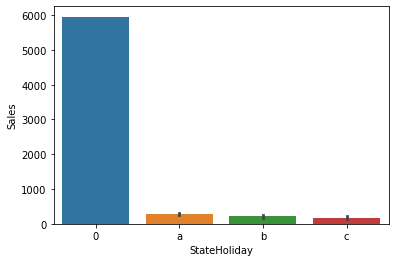

In [38]:
### Relationship between Promo and sales
sns.barplot(x="StateHoliday",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

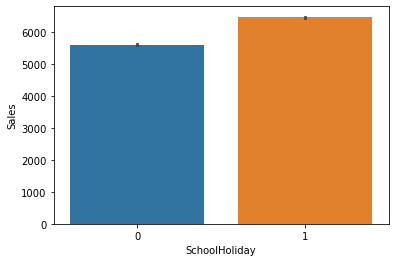

In [39]:
#Relationship between SchoolHoliday and sales
sns.barplot(x="SchoolHoliday",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

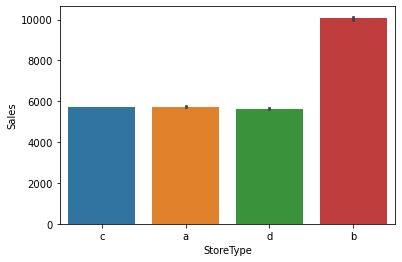

In [40]:
#Relationship between StoreType and sales
sns.barplot(x="StoreType",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

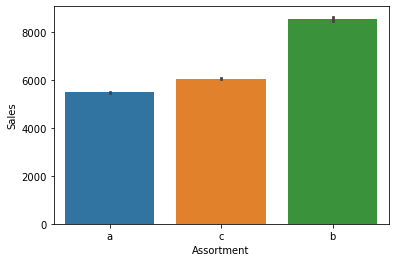

In [41]:
#Relationship between Assortment and sales
sns.barplot(x="Assortment",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

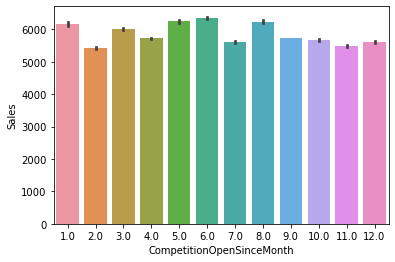

In [42]:
#Relationship between CompetitionOpenSinceMonth and sales
sns.barplot(x="CompetitionOpenSinceMonth",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Promo2', ylabel='Sales'>

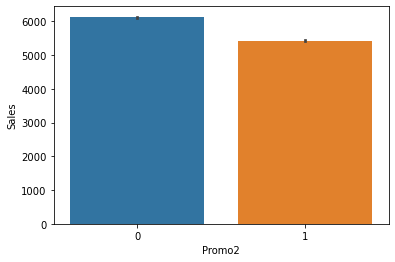

In [43]:
#Relationship between Promo2 and sales
sns.barplot(x="Promo2",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Promo2SinceYear', ylabel='Sales'>

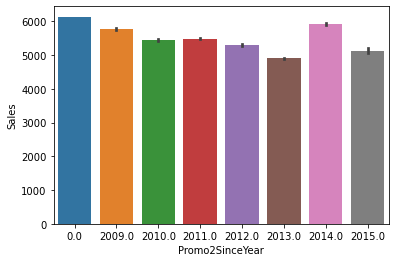

In [44]:
#Relationship between Promo2SinceYear and sales
sns.barplot(x="Promo2SinceYear",y="Sales",data=df)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='PromoInterval', ylabel='Sales'>

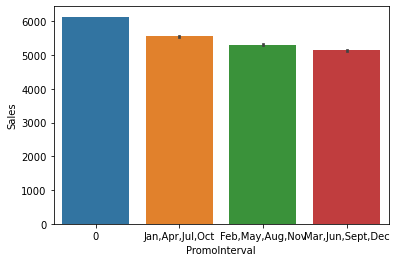

In [45]:
#Relationship between PromoInterval and sales
sns.barplot(x="PromoInterval",y="Sales",data=df)

There were more sales on Monday, probably because shops generally remain closed on Sundays.
It could be seen that the Promo leads to more sales.
More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
On an average Store type B had the highest sales.
Highest average sales were seen with Assortment levels-b which is 'extra'.
With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

In [46]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()

<ipython-input-46-e292d107721b>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['WeekOfYear'] = df['Date'].dt.weekofyear


In [47]:
years

array([2015, 2014, 2013], dtype=int64)

In [49]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [50]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

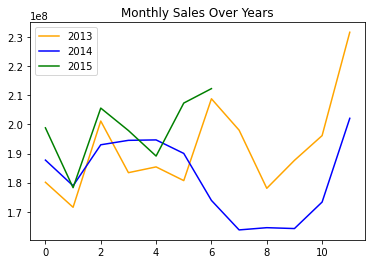

In [51]:
#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September

Total number of Outliers present in the Sales column are 9731.


<IPython.core.display.Javascript object>

C:\Users\abhin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Outliers Distribution')]

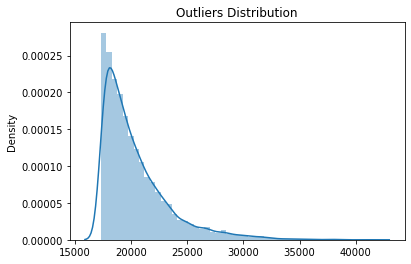

In [54]:
#code to seperate outliers
mean_sales = np.mean(df['Sales']) #mean
sd_sales = np.std(df['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

The data points with sales value higher than 28000 are very low and hence they can be considered as outliers.

In [57]:
#percentage of sales greater than 28000 
sales_outliers = df.loc[df['Sales']>28000]
percentage_of_outliers = (len(sales_outliers)/len(df))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.031065395606999148
